In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold #Import KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.utils import to_categorical

# Load the dataset from a CSV file
df = pd.read_csv('D:\kuliah\THE ONLY TA THINGS\DATA\data clean\cleaned_data_5000.csv')
df.head()

,content,score,at,label,cleansing,case_folding,no_unwanted,tokenize,normalization,stopwords,stemming,clean
0,Tanpa keterangan,4,2023-04-07 18:17:53,1,Tanpa keterangan,tanpa keterangan,tanpa keterangan,"['tanpa', 'keterangan']","['tanpa', 'keterangan']",['keterangan'],['terang'],terang
1,Sangat menghibur,5,2023-04-09 22:23:31,1,Sangat menghibur,sangat menghibur,sangat menghibur,"['sangat', 'menghibur']","['sangat', 'menghibur']",['menghibur'],['hibur'],hibur
2,Tidak dapat di instal,1,2023-04-12 21:45:11,-1,Tidak dapat di instal,tidak dapat di instal,tidak dapat di instal,"['tidak', 'dapat', 'di', 'instal']","['tidak', 'dapat', 'di', 'install']",['install'],['install'],install
3,Bagus banget siapapun yg buat ini bagus bgt🤩🤩🤩🤩🤩,5,2023-04-13 16:11:48,1,Bagus banget siapapun yg buat ini bagus bgt,bagus banget siapapun yg buat ini bagus bgt,bagus banget siapapun yg buat ini bagus bgt,"['bagus', 'banget', 'siapapun', 'yg', 'buat', ...","['bagus', 'banget', 'siapapun', 'yang', 'buat'...","['bagus', 'banget', 'bagus', 'banget']","['bagus', 'banget', 'bagus', 'banget']",bagus banget bagus banget
4,Aplikasinya sangat bagus,5,2023-04-08 21:57:58,1,Aplikasinya sangat bagus,aplikasinya sangat bagus,aplikasinya sangat bagus,"['aplikasinya', 'sangat', 'bagus']","['aplikasinya', 'sangat', 'bagus']","['aplikasinya', 'bagus']","['aplikasi', 'bagus']",aplikasi bagus


_`Define Hyperparameter and constatn variables`_

In [3]:
# constants
TFIDF_MAX_FEATURES = 1000
EPOCH_VAL = 10
NUM_CLASSES = 3
BATCH_SIZE = 32

In [4]:
df['label'].value_counts()

label
 1    4017
-1     739
 0     244
Name: count, dtype: int64

In [5]:
# Split the data into features and labels
reviews = df['clean'].astype(str).values

raw_label = df['label']
# labels = pd.get_dummies(raw_label).astype(int).values
labels = to_categorical(raw_label, num_classes=NUM_CLASSES)


In [6]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
review_train, review_test, label_train, label_test = train_test_split(reviews, labels, test_size=0.3, random_state=42)

In [8]:
# Tokenize and vectorize the tweets using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=TFIDF_MAX_FEATURES)
tfidf_review_train = tfidf_vectorizer.fit_transform(review_train).toarray()
tfidf_review_test = tfidf_vectorizer.transform(review_test).toarray()

max_length = tfidf_review_train.shape[1]

# add an additional dimension for the max_length dimension
tfidf_review_train = tfidf_review_train.reshape(tfidf_review_train.shape[0], 1, tfidf_review_train.shape[1])
tfidf_review_test = tfidf_review_test.reshape(tfidf_review_test.shape[0], 1, tfidf_review_test.shape[1])



In [9]:
print("x_train: ", tfidf_review_train.shape)
print("x_test: ", tfidf_review_test.shape)
print("y_train: ", label_train.shape)
print("y_test: ", label_test.shape)
print("max_length: ", max_length)

x_train:  (3500, 1, 1000)
x_test:  (1500, 1, 1000)
y_train:  (3500, 3)
y_test:  (1500, 3)
max_length:  1000


In [10]:
def rnn_model():
    model = Sequential()
    # # add bidirectional LSTM layer
    # model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(max_length,)))
    model.add(SimpleRNN(units=64, input_shape=(1, max_length)))
    # add dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    # add dense layer with softmax activation for multi-class classification
    model.add(Dense(units=3, activation='softmax'))
    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [11]:
model = rnn_model()
model_fit_result = model.fit(tfidf_review_train, label_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(tfidf_review_test, label_test))


Epoch 1/10
110/110 [==============================] - 2s 7ms/step - loss: 0.7058 - accuracy: 0.7834 - val_loss: 0.5271 - val_accuracy: 0.8040
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.8149 - val_loss: 0.4667 - val_accuracy: 0.8213
Epoch 3/10
110/110 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8540 - val_loss: 0.4409 - val_accuracy: 0.8427
Epoch 4/10
110/110 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8783 - val_loss: 0.4281 - val_accuracy: 0.8507
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3577 - accuracy: 0.8900 - val_loss: 0.4248 - val_accuracy: 0.8533
Epoch 6/10
110/110 [==============================] - 1s 8ms/step - loss: 0.3352 - accuracy: 0.8963 - val_loss: 0.4245 - val_accuracy: 0.8533
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3175 - accuracy: 0.9063 - val_loss: 0.4269 - val_accuracy: 0.8560
Epoch 

In [12]:
# Predict the labels for the testing data
label_pred_prob = model.predict(tfidf_review_test)
label_pred = label_pred_prob.argmax(axis=1)-1
label_test_one_dim = np.argmax(label_test, axis=1)-1

47/47 [==============================] - 0s 2ms/step


In [13]:
print("RNN-TFIDF \n")

# print(accuracy_score(label_test_one_dim, label_pred))
print(confusion_matrix(label_test_one_dim, label_pred))
print(classification_report(label_test_one_dim, label_pred))
print("Precision: ",precision_score(label_test_one_dim, label_pred, average="macro"))
print("Recall: ",recall_score(label_test_one_dim, label_pred, average="macro"))
print("F1: ",f1_score(label_test_one_dim, label_pred,  average="macro"))
print("Accuracy: ",accuracy_score(label_test_one_dim, label_pred))

RNN-TFIDF 

[[  14   40   12]
 [   7 1156   43]
 [   4  105  119]]
              precision    recall  f1-score   support

          -1       0.56      0.21      0.31        66
           0       0.89      0.96      0.92      1206
           1       0.68      0.52      0.59       228

    accuracy                           0.86      1500
   macro avg       0.71      0.56      0.61      1500
weighted avg       0.84      0.86      0.84      1500

Precision:  0.7108184391022526
Recall:  0.5641972222883456
F1:  0.6073166329582692
Accuracy:  0.8593333333333333


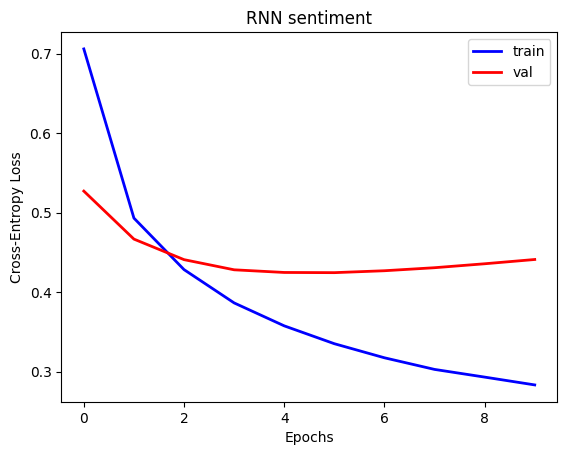

In [14]:
plt.figure()
plt.plot(model_fit_result.history['loss'], lw=2.0, color='b', label='train')
plt.plot(model_fit_result.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc ='upper right')
plt.show()

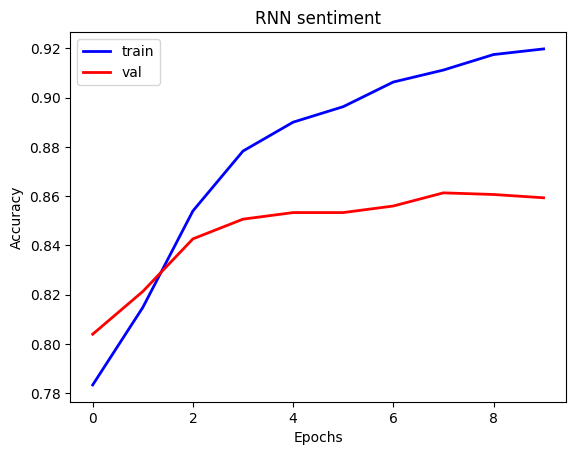

In [15]:
plt.figure()
plt.plot(model_fit_result.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(model_fit_result.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                68160     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 68,355
Trainable params: 68,355
Non-trainable params: 0
_________________________________________________________________


## implement with k-fold cross validation

In [17]:
# define the range of K values to test
k_values = range(2, 11)

# create an array to store the maximum accuracy achieved for each K value
max_acc = np.zeros(len(k_values))

# loop over the K values
for i, k in enumerate(k_values):
    # create the KFold object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # perform cross-validation
    acc_list = []
    for train_idx, test_idx in kf.split(tfidf_review_train, label_train):
        X_train, X_test = tfidf_review_train[train_idx], tfidf_review_train[test_idx]
        y_train, y_test = label_train[train_idx], label_train[test_idx]
        
        # define and fit the model
        model = rnn_model()
        model_fit_kfold = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(X_test, y_test))
        
        # evaluate the model on the test set and store the accuracy
        acc = model.evaluate(X_test, y_test)[1]
        acc_list.append(acc)
        
    # calculate the maximum accuracy achieved for this K value
    max_acc[i] = np.max(acc_list)
    
# find the K value with the highest maximum accuracy
best_k = k_values[np.argmax(max_acc)]

print(f"Best K value: {best_k}")

Epoch 1/10
55/55 [==============================] - 3s 16ms/step - loss: 0.8609 - accuracy: 0.7543 - val_loss: 0.6401 - val_accuracy: 0.8029
Epoch 2/10
55/55 [==============================] - 0s 7ms/step - loss: 0.5492 - accuracy: 0.8034 - val_loss: 0.5474 - val_accuracy: 0.8029
Epoch 3/10
55/55 [==============================] - 0s 8ms/step - loss: 0.4715 - accuracy: 0.8091 - val_loss: 0.5219 - val_accuracy: 0.8103
Epoch 4/10
55/55 [==============================] - 0s 8ms/step - loss: 0.4200 - accuracy: 0.8474 - val_loss: 0.5052 - val_accuracy: 0.8280
Epoch 5/10
55/55 [==============================] - 0s 8ms/step - loss: 0.3825 - accuracy: 0.8737 - val_loss: 0.4947 - val_accuracy: 0.8394
Epoch 6/10
55/55 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.8926 - val_loss: 0.4884 - val_accuracy: 0.8417
Epoch 7/10
55/55 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.9069 - val_loss: 0.4862 - val_accuracy: 0.8417
Epoch 8/10
55/55 [=

In [18]:
print("Max accuration Word2Vec-TFIDF in 10 times k-fold cross validation: \n")

for i, val in enumerate(acc_list, start=2):
    print("Fold {}: {}".format(i, val))

print('\n')
print("max accuracy: ", np.max(acc_list)*100)
print("avg accuracy: ", np.mean(acc_list)*100)

best_k = k_values[np.argmax(max_acc)]
print(f"Best K value: {best_k}")

Max accuration Word2Vec-TFIDF in 10 times k-fold cross validation: 

Fold 2: 0.8600000143051147
Fold 3: 0.845714271068573
Fold 4: 0.8571428656578064
Fold 5: 0.8399999737739563
Fold 6: 0.854285717010498
Fold 7: 0.8600000143051147
Fold 8: 0.8742856979370117
Fold 9: 0.8885714411735535
Fold 10: 0.8942857384681702
Fold 11: 0.8799999952316284


max accuracy:  89.42857384681702
avg accuracy:  86.54285728931427
Best K value: 9


_`K-fold cross validation with choosen K value (best accuracy)`_

In [19]:
# split data into K folds

Best_K_value = 9

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

kf = KFold(n_splits=Best_K_value, random_state=0, shuffle = True)
for fold, (train_idx, val_idx) in enumerate(kf.split(tfidf_review_train, label_train)):
    
    # Split train data into train and validation sets
    x_train_fold = tfidf_review_train[train_idx]
    y_train_fold = label_train[train_idx]
    x_val_fold = tfidf_review_train[val_idx]
    y_val_fold = label_train[val_idx]

    # build and compile the model
    model = rnn_model()

    # train the model
    result_fit_kfold = model.fit(tfidf_review_train, label_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(tfidf_review_test, label_test))

    # evaluate the model on test set
    score = model.evaluate(tfidf_review_test, label_test, batch_size=BATCH_SIZE, verbose=1)
    print("Fold %d: %s: %.2f%%" % (fold+1, model.metrics_names[1], score[1]*100)) 

    # Predict the labels for the testing data
    label_pred_prob = model.predict(tfidf_review_test)
    label_pred = label_pred_prob.argmax(axis=1)-1
    label_test_one_dim = np.argmax(label_test, axis=1)-1

    actual_classes = np.append(actual_classes, label_test_one_dim)
    predicted_classes = np.append(predicted_classes, label_pred)

Epoch 1/10
110/110 [==============================] - 2s 7ms/step - loss: 0.7263 - accuracy: 0.7849 - val_loss: 0.5281 - val_accuracy: 0.8040
Epoch 2/10
110/110 [==============================] - 1s 5ms/step - loss: 0.4945 - accuracy: 0.8123 - val_loss: 0.4664 - val_accuracy: 0.8240
Epoch 3/10
110/110 [==============================] - 1s 6ms/step - loss: 0.4314 - accuracy: 0.8557 - val_loss: 0.4406 - val_accuracy: 0.8427
Epoch 4/10
110/110 [==============================] - 1s 6ms/step - loss: 0.3881 - accuracy: 0.8771 - val_loss: 0.4294 - val_accuracy: 0.8507
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3627 - accuracy: 0.8889 - val_loss: 0.4253 - val_accuracy: 0.8500
Epoch 6/10
110/110 [==============================] - 1s 6ms/step - loss: 0.3377 - accuracy: 0.8969 - val_loss: 0.4248 - val_accuracy: 0.8540
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3183 - accuracy: 0.9071 - val_loss: 0.4266 - val_accuracy: 0.8587
Epoch 

In [20]:
print("RNN-TFIDF w/ kfold (Best_K_value = %2d): \n" %(Best_K_value))
print(confusion_matrix(label_test_one_dim, label_pred))
print(classification_report(label_test_one_dim, label_pred))
print("Precision: ",precision_score(label_test_one_dim, label_pred, average="macro"))
print("Recall: ",recall_score(label_test_one_dim, label_pred, average="macro"))
print("F1: ",f1_score(label_test_one_dim, label_pred,  average="macro"))
print("Accuracy: ",accuracy_score(label_test_one_dim, label_pred))

RNN-TFIDF w/ kfold (Best_K_value =  9): 

[[  14   42   10]
 [   7 1155   44]
 [   3  105  120]]
              precision    recall  f1-score   support

          -1       0.58      0.21      0.31        66
           0       0.89      0.96      0.92      1206
           1       0.69      0.53      0.60       228

    accuracy                           0.86      1500
   macro avg       0.72      0.57      0.61      1500
weighted avg       0.84      0.86      0.84      1500

Precision:  0.7200284266468916
Recall:  0.5653828147936553
F1:  0.609726222687731
Accuracy:  0.8593333333333333


In [21]:
model.metrics_names

['loss', 'accuracy']

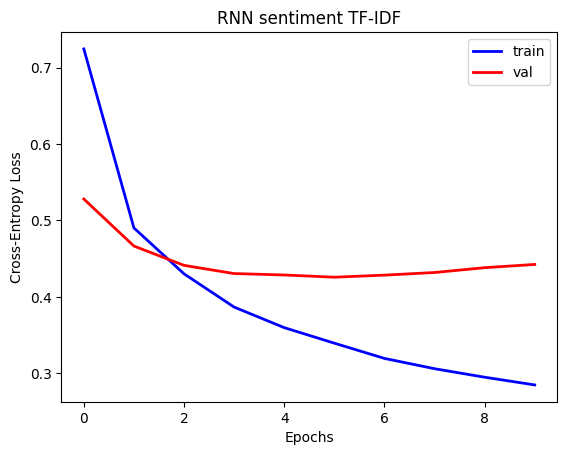

In [41]:
plt.figure()
plt.plot(result_fit_kfold.history['loss'], lw=2.0, color='b', label='train')
plt.plot(result_fit_kfold.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc ='upper right')
plt.show()

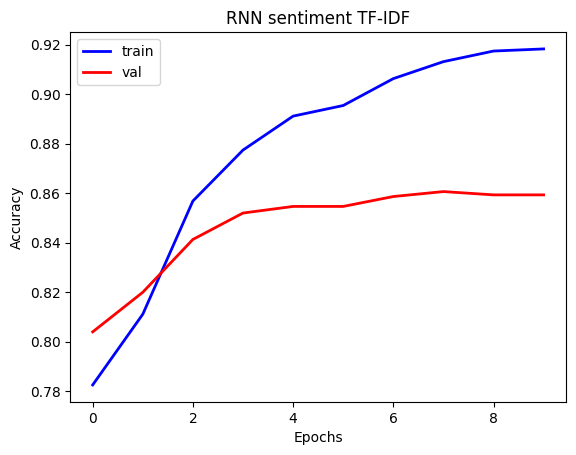

In [42]:
plt.figure()
plt.plot(result_fit_kfold.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(result_fit_kfold.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [24]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_63 (SimpleRNN)   (None, 64)                68160     
                                                                 
 dropout_63 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 3)                 195       
                                                                 
Total params: 68,355
Trainable params: 68,355
Non-trainable params: 0
_________________________________________________________________


In [25]:
arr_conf_matrix = confusion_matrix(label_test_one_dim, label_pred)
arr_conf_matrix

array([[  14,   42,   10],
       [   7, 1155,   44],
       [   3,  105,  120]], dtype=int64)

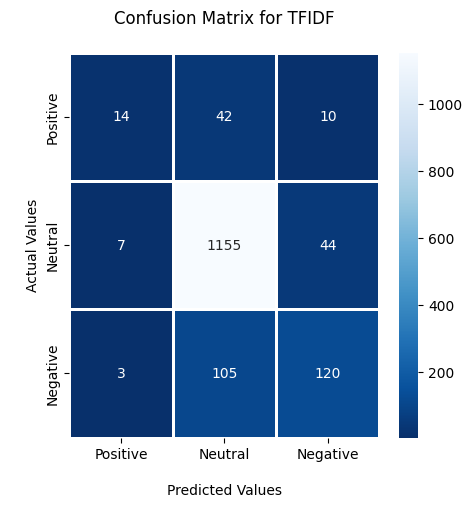

In [40]:
plt.figure(figsize = (5, 5))

# Membuat heatmap menggunakan Seaborn
ax = sns.heatmap(arr_conf_matrix, linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '', cmap='Blues_r', xticklabels = ['Positive', 'Neutral', 'Negative'],
                    yticklabels = ['Positive','Neutral', 'Negative'] )
ax.set_title("Confusion Matrix for TFIDF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")


# Menampilkan plot
plt.show()